In [3]:
%matplotlib inline

In [4]:
import numpy as np
from skimage.io import imshow, imread, imsave
from skimage.color import rgb2gray
from skimage.exposure import equalize_hist
import pandas as pd

In [7]:
from transform import load_training

In [10]:
training = load_training()

In [21]:
def recenter():
    ratios = []
    sum_pixels = 0
    size_pixels = 0
    for i, row in training.iterrows():
        row_patches = []
        row_output = []
        name = row['name']
        print("Gathering image %s" % name)
        import sys
        sys.stdout.flush()
        for kind in ["DX", "TS"]:
            img = np.load("images-cropped/%s/%s-%s.png" % (kind, name, kind))
            sum_pixels += img.sum()
            size_pixels += img.size
    new_mean = sum_pixels / float(size_pixels)
    for i, row in training.iterrows():
        row_patches = []
        row_output = []
        name = row['name']
        print("Recentering image %s" % name)
        import sys
        sys.stdout.flush()
        for kind in ["DX", "TS"]:
            img = np.load("images-cropped/%s/%s-%s.png" % (kind, name, kind))
            img_recentered = img - (img.mean() - new_mean)
            img_recentered = np.clip(img_recentered, 0, 1)
            with open("images-recentered/%s/%s-%s.png" % (kind, name, kind), 'w') as f:
                np.save(f, img_recentered)

In [16]:
recenter()

Gathering image 10500
Gathering image 10549
Gathering image 11169
Gathering image 13188
Gathering image 13699
Gathering image 14812
Gathering image 15160
Gathering image 15456
Gathering image 15770
Gathering image 16199
Gathering image 18162
Gathering image 19568
Gathering image 19583
Gathering image 19906
Gathering image 20830
Gathering image 20843
Gathering image 21157
Gathering image 21803
Gathering image 22321
Gathering image 22337
Gathering image 22926
Gathering image 23817
Gathering image 24457
Gathering image 24662
Gathering image 25230
Gathering image 25518
Gathering image 25755
Gathering image 25976
Gathering image 26618
Gathering image 27551
Gathering image 27907
Gathering image 27920
Gathering image 29980
Gathering image 30003
Gathering image 30192
Gathering image 30333
Gathering image 30848
Gathering image 30890
Gathering image 31581
Gathering image 31752
Gathering image 33088
Gathering image 33159
Gathering image 35277
Gathering image 35897
Gathering image 36696
Gathering 

KeyboardInterrupt: 

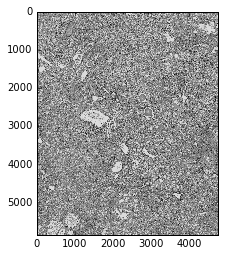

In [20]:
imshow(np.load("images-recentered/DX/18162-DX.png"))